In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from functions import plot_corr
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
import datetime as dt


In [3]:
data = pd.read_csv('data/curr_price_financial_fill.csv')
data = data.dropna(axis=0)
industries = pd.read_csv('data/train_files/stock_list.csv')
financial = pd.read_csv('data/train_files/financials.csv')
imp = industries[['SecuritiesCode', 'Section/Products', '17SectorName', 'IssuedShares']]
imp.columns = ['SecuritiesCode', 'Section', 'Sector', 'Shares']
liste = data.SecuritiesCode.unique()
imp = imp.query('SecuritiesCode in @liste')
df = pd.merge(data, imp, how='left', on='SecuritiesCode')
df = df.dropna(axis=0)
#sns.set_context("talk", font_scale=1.4) #this will be applied to all subsequent executed plots
#plt.style.use('ggplot')

/var/folders/zn/s4295xwn7kj92hy1gg99j03h0000gn/T/ipykernel_11645/903864710.py:4: DtypeWarning: Columns (14,15,16,17,18,19,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  financial = pd.read_csv('data/train_files/financials.csv')


In [5]:
df['cap'] = df.ad_Close * df.Shares
df['pe'] = df.cap / df.Profit
df['peg'] = df.pe / df.win_quarter_growth

In [6]:
query = df.query('SecuritiesCode == 8194')
query['Date'] = pd.to_datetime(query.Date)

/var/folders/zn/s4295xwn7kj92hy1gg99j03h0000gn/T/ipykernel_11645/1163817294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query['Date'] = pd.to_datetime(query.Date)


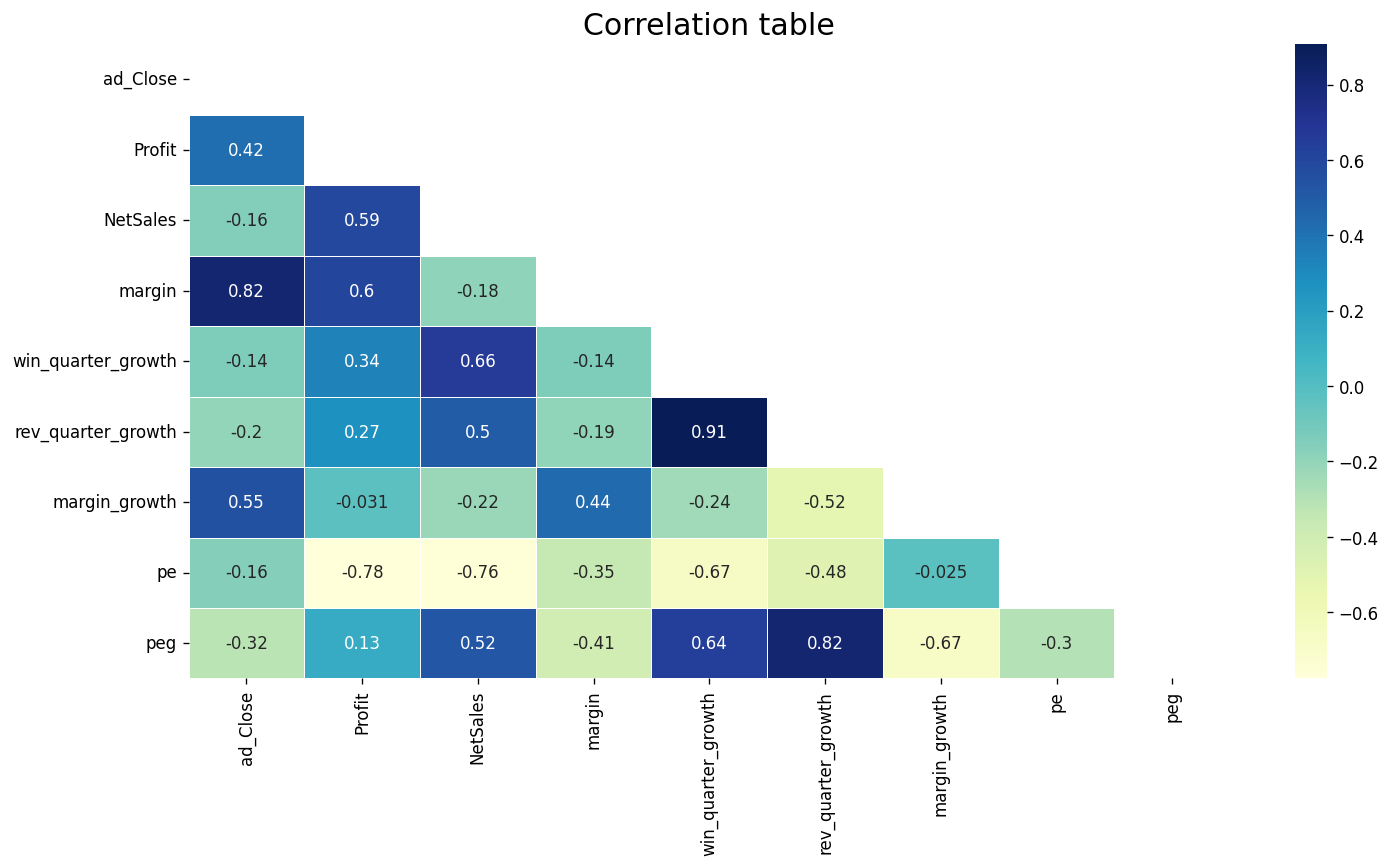

In [7]:
plot_corr(query[['ad_Close' ,'Profit', 'NetSales', 'margin', 'win_quarter_growth', 'rev_quarter_growth', 'margin_growth', 'Sector', 'pe', 'peg']])

/Users/corneliusbohle/Desktop/tokyo/tokyo-stock-exchange/.capstone/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/corneliusbohle/Desktop/tokyo/tokyo-stock-exchange/.capstone/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


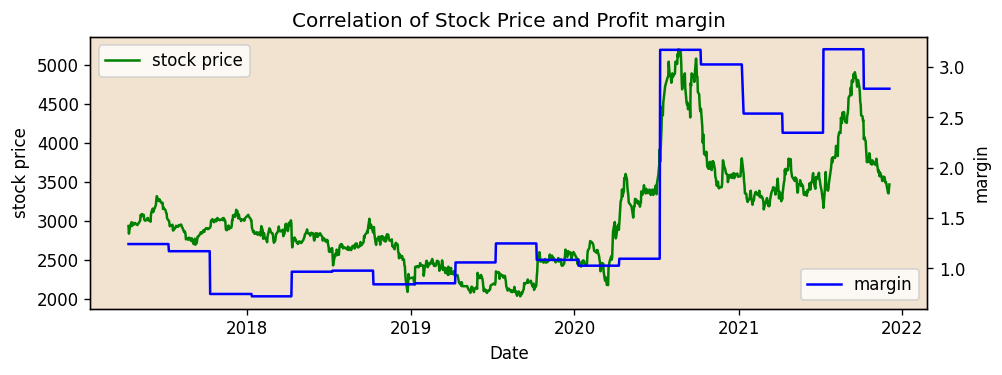

In [11]:
import matplotlib.pyplot as plt
ax = sns.lineplot(query.Date, query.ad_Close, color="g")
ax2 = plt.twinx()
sns.lineplot(query.Date, query.margin, color="b", ax=ax2)
plt.title('Correlation of Stock Price and Profit margin')
ax.legend(['stock price'])
ax2.legend(['margin'], loc='lower right')
ax.set_ylabel(ylabel='stock price')
ax2.set_ylabel(ylabel='margin')
ax.set_facecolor('#F2E3D1')




/Users/corneliusbohle/Desktop/tokyo/tokyo-stock-exchange/.capstone/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/corneliusbohle/Desktop/tokyo/tokyo-stock-exchange/.capstone/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


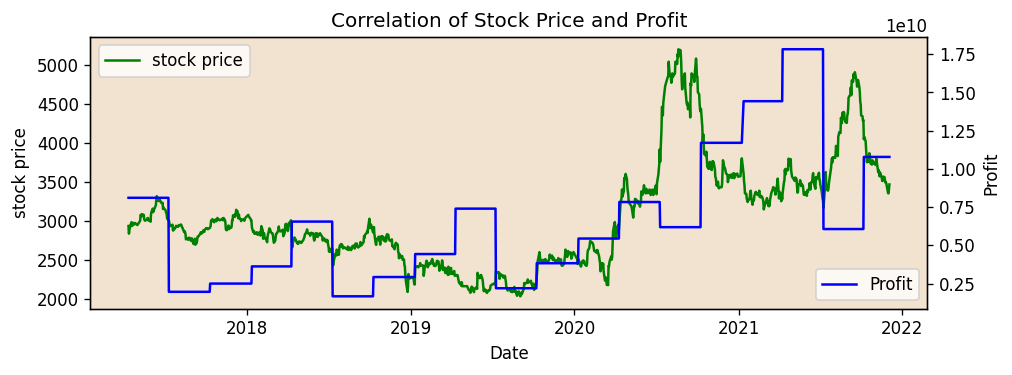

In [10]:
ax = sns.lineplot(query.Date, query.ad_Close, color="g")
ax2 = plt.twinx()
sns.lineplot(query.Date, query.Profit, color="b", ax=ax2)
plt.title('Correlation of Stock Price and Profit')
ax.set_ylabel(ylabel='stock price')
ax2.set_ylabel(ylabel='Profit')
ax.legend(['stock price'])
ax2.legend(['Profit'], loc='lower right')
ax.set_facecolor('#F2E3D1')